In [1]:
# Dean Fuad, Big Data Assessment 3
# Due August 24 2020 12:00pm
# import the functions and load the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df= pd.read_csv('data_assignment.csv')

In [2]:
#build and describe the data set
#chose Sydney and Brisbane locations and print snapshot of data
df_sydney = df[df["Location"] == "Sydney" ]  
df_brisbane = df[df["Location"] == "Brisbane" ]

df_two_cities = df_sydney.append(df_brisbane, ignore_index = True) 

print (df_two_cities.nunique())

Id                   62895
Title                41305
Company              11422
Date                    44
Location                 2
Area                    12
Classification          30
SubClassification      337
Requirement          52033
FullDescription      54154
LowestSalary            11
HighestSalary           11
JobType                  4
dtype: int64


In [4]:
# how many jobs and jobtypes are there per city in the data set

print(df_two_cities['Location'].value_counts() )

df_two_cities.groupby(['Location', 'JobType']).size().reset_index(name='Number of Jobs')




Sydney      46357
Brisbane    16538
Name: Location, dtype: int64


,Location,JobType,Number of Jobs
0,Brisbane,Casual/Vacation,1543
1,Brisbane,Contract/Temp,3164
2,Brisbane,Full Time,10431
3,Brisbane,Part Time,988
4,Sydney,Casual/Vacation,2542
5,Sydney,Contract/Temp,8420
6,Sydney,Full Time,32267
7,Sydney,Part Time,2277


In [6]:
# what top 5 sectors per city and number of jobs
# print (df_sydney.nunique())
# print (df_brisbane.nunique())

sector_df_sydney = df_sydney[df_sydney['Classification'].isna()==False]
sector_df_sydney = df_sydney.groupby('Classification').count()
sector_df_sydney['Classification'] = sector_df_sydney.index
sector_df_sydney['Count'] = sector_df_sydney["Id"]


sector_df_sydney = sector_df_sydney.sort_values(by=["Count"], ascending =False)
sector_df_sydney_top5 = sector_df_sydney[:5].copy()

print("Top 5 Job Sectors in Sydney")
print(sector_df_sydney_top5['Id'])


Top 5 Job Sectors in Sydney
Classification
Information & Communication Technology    6999
Trades & Services                         3181
Accounting                                3105
Hospitality & Tourism                     3081
Manufacturing, Transport & Logistics      2536
Name: Id, dtype: int64


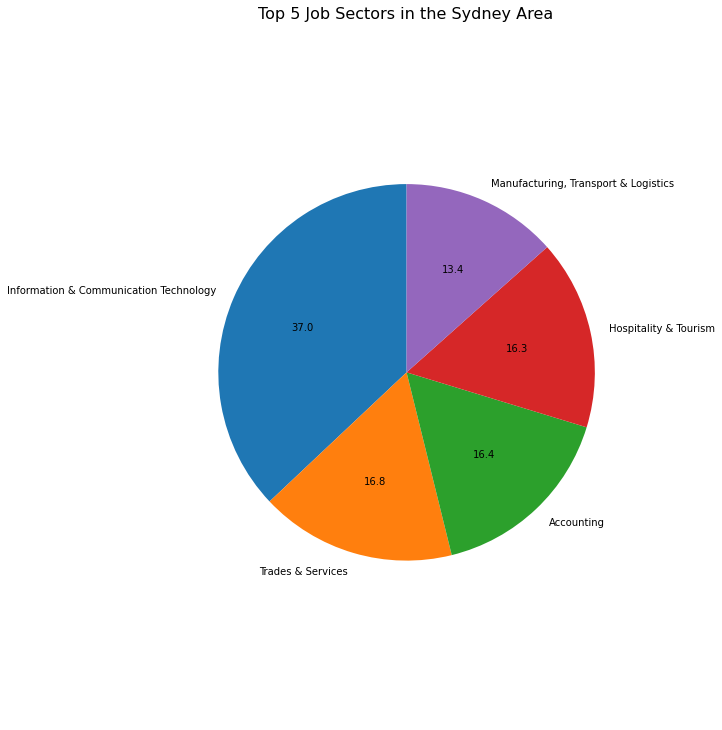

In [9]:
sector_df_brisbane = df_brisbane[df_brisbane['Classification'].isna()==False]
sector_df_brisbane = sector_df_brisbane.groupby('Classification').count()
sector_df_brisbane['Classification'] = sector_df_brisbane.index
sector_df_brisbane['Count'] = sector_df_brisbane["Id"]


sector_df_brisbane = sector_df_brisbane.sort_values(by=["Count"], ascending =False)
sector_df_brisbane_top5 = sector_df_brisbane[:5].copy()

print("Top 5 Job Sectors in Brisbane")
print(sector_df_brisbane_top5['Id'])

Top 5 Job Sectors in Brisbane
Classification
Information & Communication Technology    2041
Trades & Services                         1627
Healthcare & Medical                      1341
Manufacturing, Transport & Logistics      1338
Hospitality & Tourism                     1032
Name: Id, dtype: int64


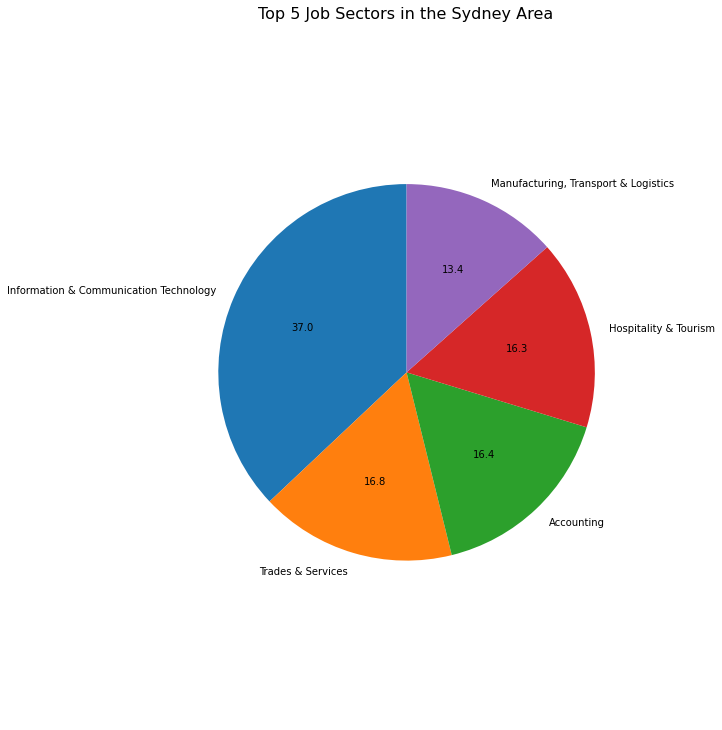

In [11]:
# plot a pie chart for the top 5 sectors in SYDNEY
sector_df_sydney_top5.index = sector_df_sydney_top5['Classification']
fig, ax = plt.subplots(figsize=(10,10)) 
plt.pie(sector_df_sydney_top5["Count"], labels=sector_df_sydney_top5["Classification"], autopct='%1.1f', startangle=90 )
plt.axis('equal')
plt.tight_layout()
plt.title('Top 5 Job Sectors in the Sydney Area',size=16,loc='center')
plt.ylabel('')
plt.show()

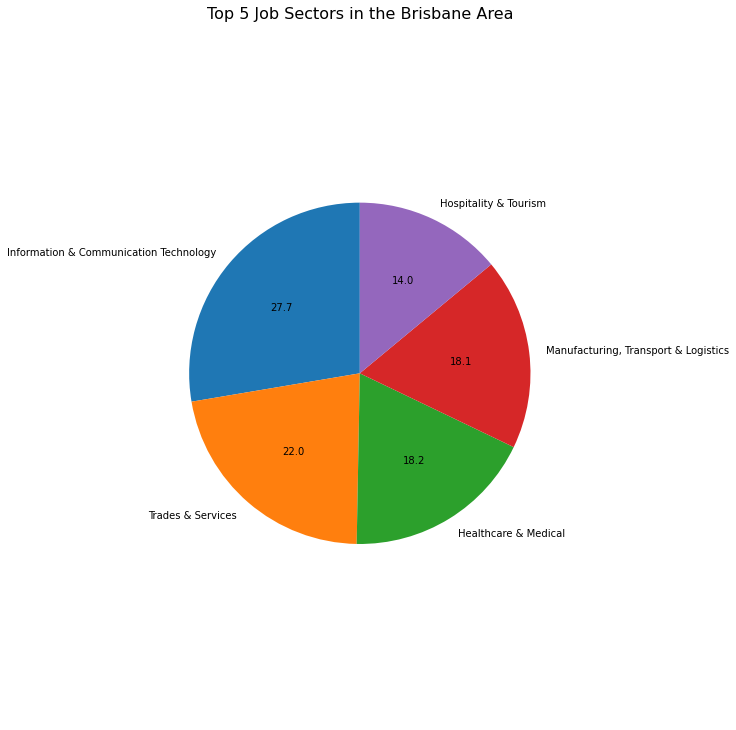

In [12]:
# plot a pie chart for the top 5 sectors in BRISBANE

sector_df_brisbane_top5.index = sector_df_brisbane_top5['Classification']
fig, ax = plt.subplots(figsize=(10,10)) 
plt.pie(sector_df_brisbane_top5["Count"], labels=sector_df_brisbane_top5["Classification"], autopct='%1.1f', startangle=90 )
plt.axis('equal')
plt.tight_layout()
plt.title('Top 5 Job Sectors in the Brisbane Area',size=16,loc='center')
plt.ylabel('')
plt.show()

In [ ]:
# just make sure we have original data
df_sydney = df[df["Location"] == "Sydney" ]  
df_brisbane = df[df["Location"] == "Brisbane" ]
df_two_cities = df_sydney.append(df_brisbane, ignore_index = True) 

# then group by salary range and location
dfsalrange=df_two_cities
dfsalrange = dfsalrange.groupby(['Location', 'LowestSalary', 'HighestSalary']).size().reset_index(name='Number of Jobs')
print (dfsalrange)

In [14]:
# what are the top 5 companies advertising in sydney and their job sector?

df_sydney = df_sydney[df_sydney['Company'].isna()==False]
comp_df_sydney = df_sydney.groupby(['Company', 'Classification']).count()
comp_df_sydney['Classification'] = comp_df_sydney.index
comp_df_sydney['Count'] = comp_df_sydney["Id"]


comp_df_sydney = comp_df_sydney.sort_values(by=["Count"], ascending =False)
comp_df_sydney_top5 = comp_df_sydney[:5].copy()

print("Top 5 Companies in Sydney")
print(comp_df_sydney_top5['Id'])


Top 5 Companies in Sydney
Company                                  Classification                        
Jora Local                               Hospitality & Tourism                     1398
Design & Build                           Construction                               234
Paxus                                    Information & Communication Technology     231
Hays Accountancy & Finance               Accounting                                 229
Gough Property & Real Estate Recruiters  Real Estate & Property                     204
Name: Id, dtype: int64


In [15]:
# what are the top 5 companies advertising in brisbane and their job sector?
df_brisbane = df_brisbane[df_brisbane['Company'].isna()==False]
comp_df_brisbane = df_brisbane.groupby(['Company', 'Classification']).count()
comp_df_brisbane['Classification'] = comp_df_brisbane.index
comp_df_brisbane['Count'] = comp_df_brisbane["Id"]


comp_df_brisbane = comp_df_brisbane.sort_values(by=["Count"], ascending =False)
comp_df_brisbane_top5 = comp_df_brisbane[:5].copy()

print("Top 5 Companies in Brisbane")
print(comp_df_brisbane_top5['Id'])

Top 5 Companies in Brisbane
Company                       Classification                        
Jora Local                    Hospitality & Tourism                     235
The University of Queensland  Education & Training                      121
Paxus                         Information & Communication Technology    121
Hudson                        Information & Communication Technology    116
MW Recruitment                Accounting                                 92
Name: Id, dtype: int64


In [17]:
# just make sure we have original data
df_sydney = df[df["Location"] == "Sydney" ]  
df_brisbane = df[df["Location"] == "Brisbane" ]
df_two_cities = df_sydney.append(df_brisbane, ignore_index = True) 

# then group by salary range and location
dfsalrange=df_two_cities
dfsalrange = dfsalrange.groupby(['Location', 'LowestSalary', 'HighestSalary']).size().reset_index(name='Number of Jobs')
print (dfsalrange)

    Location  LowestSalary  HighestSalary  Number of Jobs
0   Brisbane             0             30            2962
1   Brisbane            30             40            1192
2   Brisbane            40             50            2271
3   Brisbane            50             60            1481
4   Brisbane            60             70            1611
5   Brisbane            70             80            1384
6   Brisbane            80            100            1317
7   Brisbane           100            120            1494
8   Brisbane           120            150            1076
9   Brisbane           150            200            1202
10  Brisbane           200            250             548
11    Sydney             0             30            8427
12    Sydney            30             40            3035
13    Sydney            40             50            4406
14    Sydney            50             60            3751
15    Sydney            60             70            4152
16    Sydney  

In [ ]:
# Start

# clean up date so no Txxx
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)
df["Date"] = pd.to_datetime(df["Date"])
# confirm column Date is now type datetime64
df.dtypes

In [ ]:
#Part 1 Section 2 create average salary column
df=df.assign(AverageSalary= (df["LowestSalary"] +df["HighestSalary"])/2)
print (df.info())


In [ ]:
#clean up the ID column to make it 8 digits long only.
df['IdLen'] = df['Id'].astype(str).map(len)
print(df['IdLen'] ==8)

In [ ]:
#create dataframe for salary ranges
df_salary = df[df['AverageSalary'].isna()==False]
df_salary = df_salary.groupby('AverageSalary').count()
df_salary['Label'] = df_salary.index
df_salary['Count'] = df_salary["Id"]

plt.figure(figsize=(15,10))
barChart = sns.barplot(x='Label', y='Count', color='b', data=df_salary)
barChart.set_xticklabels(
    barChart.get_xticklabels(), 
    fontweight='light',
    fontsize='small'
)

plt.title('Job Distribution by Average Salary')
plt.xlabel('Average Salary Advertised in Thousands of Dollars')
plt.ylabel('Number of Jobs Advertised')
plt.show()



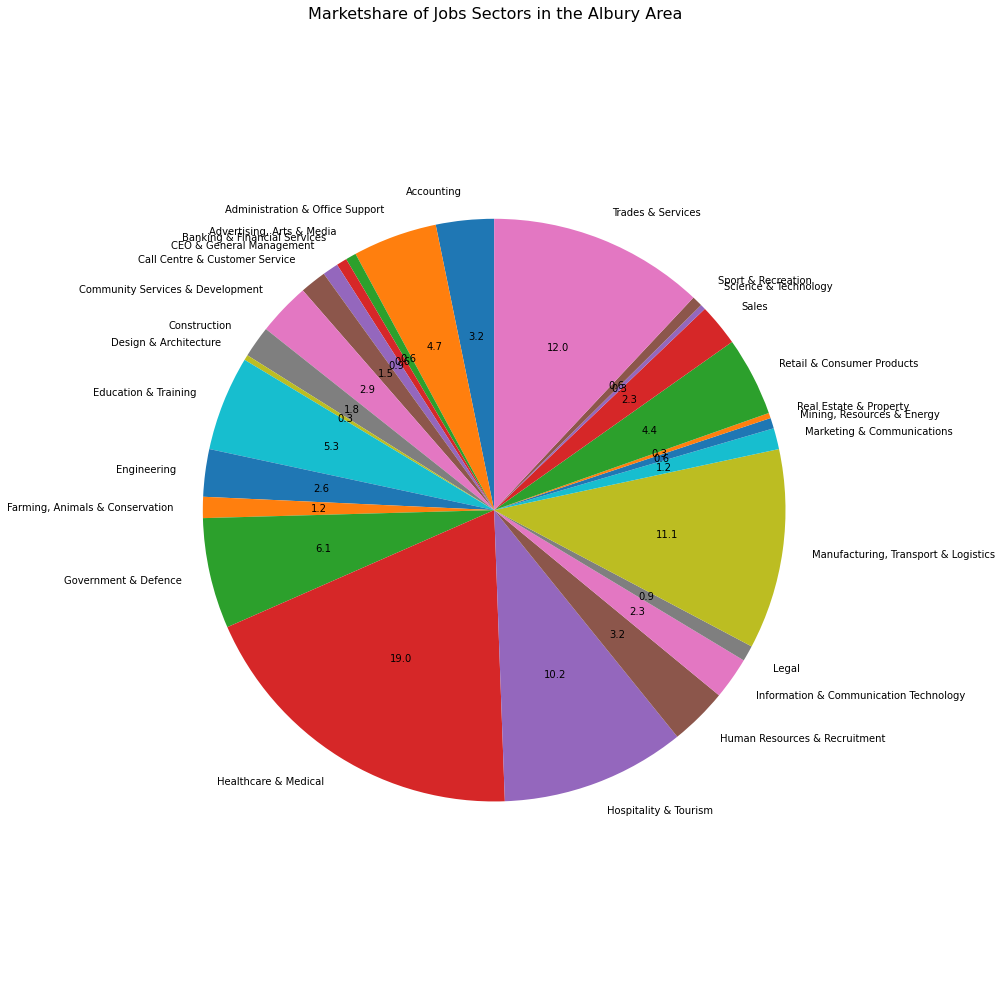

Text(0.5, 0, 'City')

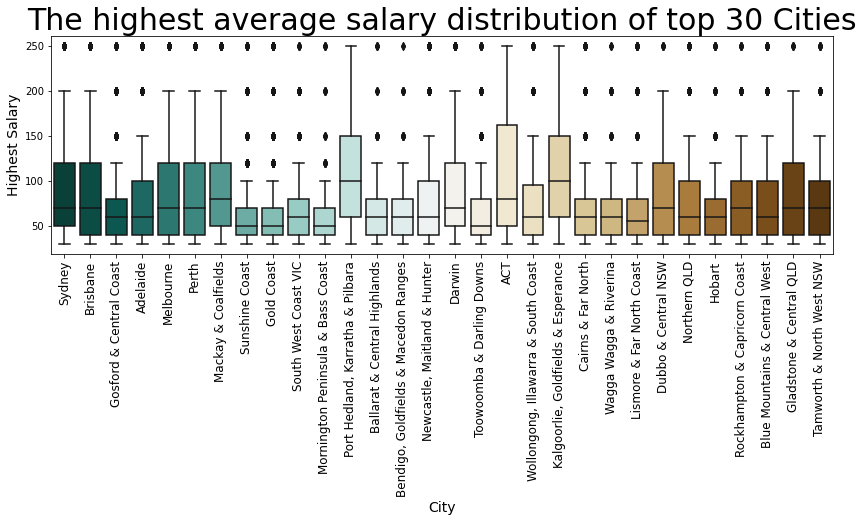

In [ ]:
# END - thank you!